In [2]:
!wget http://apache.mirrors.hoobly.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvzf spark-2.4.5-bin-hadoop2.7.tgz 
!rm spark-2.4.5-bin-hadoop2.7.tgz
!mv spark-2.4.5-bin-hadoop2.7 spark

--2020-05-06 17:37:36--  http://apache.mirrors.hoobly.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving apache.mirrors.hoobly.com (apache.mirrors.hoobly.com)... 69.64.41.166
Connecting to apache.mirrors.hoobly.com (apache.mirrors.hoobly.com)|69.64.41.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232530699 (222M) [application/x-gzip]
Saving to: ‘spark-2.4.5-bin-hadoop2.7.tgz’

spark-2.4.5-bin-had 100%[===================>] 221.76M  16.9MB/s    in 15s     

2020-05-06 17:37:51 (15.1 MB/s) - ‘spark-2.4.5-bin-hadoop2.7.tgz’ saved [232530699/232530699]

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-b

In [3]:
!cp drive/My\ Drive/6007_final/* .
!unzip devicestatus.txt.zip
!unzip lat_longs.zip
!unzip sample_geo.zip
!rm devicestatus.txt.zip
!rm lat_longs.zip
!rm sample_geo.zip

Archive:  devicestatus.txt.zip
  inflating: devicestatus.txt        
Archive:  lat_longs.zip
  inflating: lat_longs.txt           
Archive:  sample_geo.zip
  inflating: sample_geo.txt          


In [9]:
!pip install pyspark
!python3 -m pip install findspark

In [5]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [908 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sou

In [10]:
!sudo apt install openjdk-8-jdk openjdk-8-jre

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u252-b09-1~18.04).
openjdk-8-jre is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [0]:
import os
import sys
os.environ['SPARK_HOME'] ='/content/spark'
os.environ['JAVA_HOME'] ='/usr/lib/jvm/java-8-openjdk-amd64'

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
#for pseudo-cluster set-up
sc = SparkContext(master="local[2]")
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

## Via Psuedo -2 threads with cache/no cache.

In [0]:
timetable=[]

### Install necessary things

In [0]:
!sudo python3 -m pip install pandas

    100% |████████████████████████████████| 10.0MB 133kB/s eta 0:00:01
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
!sudo python3 -m pip install matplotlib

    100% |████████████████████████████████| 12.4MB 108kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 11.2MB/s ta 0:00:01
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## K-means - Device Location

In [0]:
!mkdir parsed_data

In [16]:
!unzip parsed_data.zip -d parsed_data/

Archive:  parsed_data.zip
  inflating: parsed_data/part-00000  
 extracting: parsed_data/_SUCCESS    


In [0]:
inputbucket="parsed_data/"

In [0]:
data = sc.textFile(inputbucket)

In [7]:
import time
start_time = time.time()
print(data.take(1))
print("--- %s seconds ---" % (time.time() - start_time))

["Row(latitude=33.689476013183594, longtitude=-117.54330444335938, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')"]
--- 1.1694104671478271 seconds ---


### mapping the data into a proper, clean format

In [8]:
import re
import time
start_time = time.time()

replacement=""
pattern="[A-Za-z\(]+="
data = data.map(lambda x: ( re.sub(pattern,replacement,x).replace(')','') )  )\
.map(lambda x: x.replace("'","").split(", "))\
.map(lambda x: ( float(x[0]), float(x[1]), x[2] , x[3], x[4]  ))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0007996559143066406 seconds ---


### Caching -- is lazy, won't cache until an action.

In [0]:
#data.cache()

In [0]:
#data.getStorageLevel()

### Make a dataframe with schema

In [0]:
from pyspark.sql import types
df = spark.createDataFrame(data, schema=types.StructType([\
                                                        types.StructField('latitude', types.FloatType(),True),
                                                        types.StructField('longitude', types.FloatType(),True),
                                                        types.StructField('date', types.StringType(),True),
                                                        types.StructField('manufacturer', types.StringType(),True),
                                                          types.StructField('model', types.StringType(),True)

]))

In [0]:
# df.rdd.cache() ##is lazy
# df.rdd.getStorageLevel()

### Vectorizing the feature columns, caching and using a K-Means model

In [13]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import time
start_time = time.time()

vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
X = vecAssembler.transform(df)
#X.rdd.cache()
#print(X.rdd.getStorageLevel())

# Model
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(X)

predictions = model.transform(X)

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
print("--- %s seconds ---" % (time.time() - start_time))
timetable.append((time.time() - start_time))

Cluster Centers: 
[  38.02864791 -121.23352192]
[  34.29718423 -117.78653245]
[  43.98989868 -122.77665336]
[  34.58818551 -112.35533553]
[  42.25924472 -116.90267328]
--- 13.699297428131104 seconds ---


### We are going to manually calculate the euclidean and great circle distances below.

In [0]:
predictions = predictions.rdd.map(lambda x: (x[0],x[1],x[6],float(centers[x[6]][0]),float(centers[x[6]][1])))
predictions_df = spark.createDataFrame(predictions, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)

]))

In [0]:
predictions_df.show(3)

+-----------------+------------------+----------+---------------+----------------+
|original_latitude|original_longitude|prediction|center_latitude|center_longitude|
+-----------------+------------------+----------+---------------+----------------+
|        33.689476|       -117.543304|         1|      34.297184|      -117.78653|
|         37.43211|        -121.48503|         0|       38.02865|      -121.23352|
|         39.43789|        -120.93898|         0|       38.02865|      -121.23352|
+-----------------+------------------+----------+---------------+----------------+
only showing top 3 rows



In [0]:
import pyspark.sql.functions as F
predictions_df_with_gcd = predictions_df.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
predictions_df_with_gcd.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+-----------------+-------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|          gc_dist|            eu_dist|
+-----------------+------------------+---------------+----------------+-----------------+-------------------+
|        33.689476|       -117.543304|      34.297184|      -117.78653|71197.25683187979|0.42846743379777763|
|         37.43211|        -121.48503|       38.02865|      -121.23352|69922.61967336302|0.41911582615284715|
|         39.43789|        -120.93898|       38.02865|      -121.23352|158769.1391050153| 2.0727134647313505|
+-----------------+------------------+---------------+----------------+-----------------+-------------------+
only showing top 3 rows



In [0]:
predictions_df_with_gcd.rdd.cache()
predictions_df_with_gcd.rdd.getStorageLevel()

StorageLevel(False, True, False, False, 1)

### Finding the average distance among the points

In [0]:
predictions_df_with_gcd.registerTempTable("predictions_df_with_gcd")

In [0]:
import time
start_time = time.time()

sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from predictions_df_with_gcd").show(10)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                              132700.5067084632|                              2.536413567676747|
+-----------------------------------------------+-----------------------------------------------+

--- 2.4719271659851074 seconds ---


### Visualize the clusters

In [0]:
import pandas as pd
import numpy as np
collected_data = predictions_df_with_gcd.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])
collected_array = np.array(collected_data)

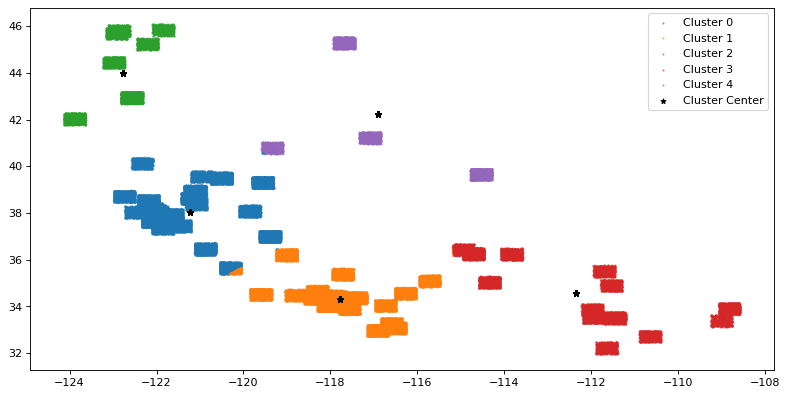

In [0]:
#colorful plot of the clusters and the cluster centers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(5):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

## K-Means Synthetic Location

### Same stuff, mapping data, making dataframe

In [0]:
inputbucket="sample_geo.txt"

In [0]:
data2 = sc.textFile(inputbucket)\
.flatMap(lambda x: x.split("\n"))\
.filter(lambda x: (x!="") and ("L" not in x) )\
.map(lambda x: x.split("\t"))\
.map(lambda x: (float(x[0]),float(x[1])))

In [0]:
# data2.cache()
# data2.getStorageLevel()

In [0]:
df2 = spark.createDataFrame(data2, schema=types.StructType([\
                                                        types.StructField('latitude', types.FloatType(),True),
                                                        types.StructField('longitude', types.FloatType(),True)

]))

In [0]:
# df2.rdd.cache()
# df2.rdd.getStorageLevel()

### Since all models are using the same input data, we should run the partially parallel and sequential to avoid unnecessary repetition.

In [19]:
start_time = time.time()

vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
X2 = vecAssembler.transform(df2)

# X2.cache()
# print(X2.rdd.getStorageLevel())

# Model
kmeans2 = KMeans().setK(2).setSeed(1)
model2 = kmeans2.fit(X2)

kmeans4 = KMeans().setK(4).setSeed(1)
model4 = kmeans4.fit(X2)

predictions2 = model2.transform(X2)
predictions4 = model4.transform(X2)

# predictions2.cache()
# predictions4.cache()

# Shows the result.
centers2 = model2.clusterCenters()
centers4 = model4.clusterCenters()
print("Cluster Centers K=2: ")
for center in centers2:
    print(center)
print("Cluster Centers K=4: ")
for center in centers4:
    print(center)
print("--- %s seconds ---" % (time.time() - start_time))
timetable.append((time.time() - start_time))

Cluster Centers K=2: 
[ 37.56474721 -82.55711082]
[  38.07161548 -116.43342043]
Cluster Centers K=4: 
[ 40.14836238 -76.96598964]
[  35.57495006 -113.07189577]
[  41.49405837 -121.33793417]
[ 35.11449777 -87.93102449]
--- 4.802078485488892 seconds ---


In [0]:
predictions2_rdd = predictions2.rdd.map(lambda x: (x[0],x[1],x[3],float(centers2[x[3]][0]),float(centers2[x[3]][1])))
df2 = spark.createDataFrame(predictions2_rdd, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)
]))

In [0]:
import pyspark.sql.functions as F
df2 = df2.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
df2.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+------------------+------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|           eu_dist|
+-----------------+------------------+---------------+----------------+------------------+------------------+
|         37.77254|         -77.49955|      37.564747|       -82.55711|445697.46533880796|25.622129831521306|
|        42.090134|        -87.689156|      37.564747|       -82.55711| 667018.4268019216|46.816980165967834|
|         39.56342|         -75.58753|      37.564747|       -82.55711| 645216.0229611602|52.569759438571054|
+-----------------+------------------+---------------+----------------+------------------+------------------+
only showing top 3 rows



In [0]:
df2.rdd.cache()

MapPartitionsRDD[1612] at javaToPython at <unknown>:0

In [0]:
start_time = time.time()
df2.registerTempTable("df")
sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from df").show(10)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                              730104.5231404818|                              70.63638292632837|
+-----------------------------------------------+-----------------------------------------------+

--- 0.6009395122528076 seconds ---


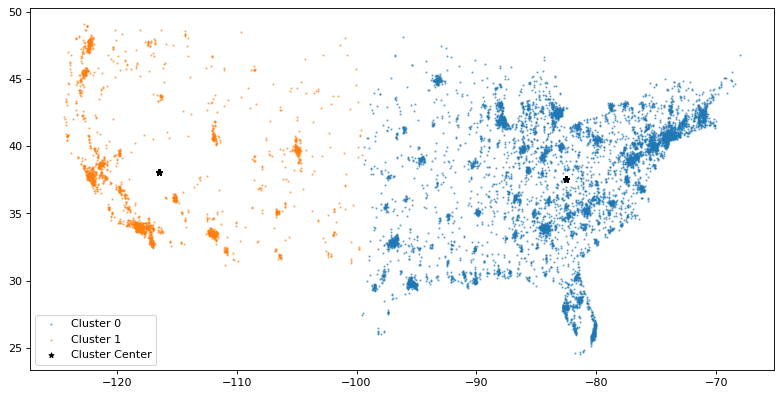

In [0]:
collected_data = df2.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])
collected_array = np.array(collected_data)
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(2):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

In [0]:
predictions4_rdd = predictions4.rdd.map(lambda x: (x[0],x[1],x[3],float(centers4[x[3]][0]),float(centers4[x[3]][1])))
df3 = spark.createDataFrame(predictions4_rdd, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)
]))

In [0]:
import pyspark.sql.functions as F
df3 = df3.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
df3.rdd.cache()

MapPartitionsRDD[1639] at javaToPython at <unknown>:0

In [0]:
df3.registerTempTable("df2")
sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from df2").show(10)

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                              532013.1570450937|                             36.665836915395765|
+-----------------------------------------------+-----------------------------------------------+



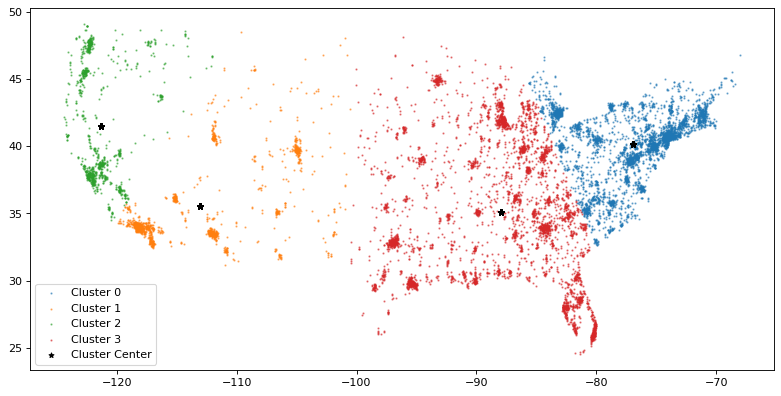

In [0]:
collected_data = df3.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])
collected_array = np.array(collected_data)
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(4):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

## K-Means DBpedia Location

In [0]:
inputbucket="lat_longs.txt"

In [0]:
import re

data = sc.textFile(inputbucket)\
.map(lambda x: x.split(" "))

In [0]:
import re
pattern="[^\d.-]+[.]{1}[^\d.]+"
repl=""
data = sc.textFile(inputbucket)\
.map(lambda x: x.split(" "))\
.map(lambda x: (re.sub(pattern,repl,x[0]),x[1],x[2]))\
.filter(lambda x: x[0]!="")\
.map(lambda x:(float(x[0]),float(x[1]), x[2] ))

In [0]:
# data.cache()
# data.getStorageLevel()

In [0]:
from pyspark.sql import types
df = spark.createDataFrame(data, schema=types.StructType([\
                                                        types.StructField('latitude', types.FloatType(),True),
                                                        types.StructField('longitude', types.FloatType(),True),
                                                        types.StructField('Site', types.StringType(),True)

]))

In [25]:
df.show(3)

+---------+---------+--------------------+
| latitude|longitude|                Site|
+---------+---------+--------------------+
|     36.7|3.2166667|<http://dbpedia.o...|
|     42.5|1.5166667|<http://dbpedia.o...|
|12.516666|-70.03333|<http://dbpedia.o...|
+---------+---------+--------------------+
only showing top 3 rows



In [0]:
# df.rdd.cache()

In [27]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import time
start_time = time.time()

vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
X3 = vecAssembler.transform(df)

# X3.rdd.cache()

# Model
kmeans2 = KMeans().setK(2).setSeed(1)
model2 = kmeans2.fit(X3)

kmeans4 = KMeans().setK(4).setSeed(1)
model4 = kmeans4.fit(X3)

kmeans6 = KMeans().setK(6).setSeed(1)
model6 = kmeans6.fit(X3)

predictions2 = model2.transform(X3)
predictions4 = model4.transform(X3)
predictions6 = model6.transform(X3)

# predictions2.rdd.cache()
# predictions4.rdd.cache()
# predictions6.rdd.cache()

# Shows the result.
centers2 = model2.clusterCenters()
centers4 = model4.clusterCenters()
centers6 = model6.clusterCenters()
print("Cluster Centers K=2: ")
for center in centers2:
    print(center)
print("Cluster Centers K=4: ")
for center in centers4:
    print(center)
print("Cluster Centers K=6: ")
for center in centers4:
    print(center)
print("--- %s seconds ---" % (time.time() - start_time))
timetable.append((time.time() - start_time))

Cluster Centers K=2: 
[40.18205687 32.48327172]
[ 35.94167287 -88.83209608]
Cluster Centers K=4: 
[48.43652453  9.99936844]
[ 35.93470852 -88.9150858 ]
[ 18.51080852 123.643959  ]
[28.35921384 56.72666129]
Cluster Centers K=6: 
[48.43652453  9.99936844]
[ 35.93470852 -88.9150858 ]
[ 18.51080852 123.643959  ]
[28.35921384 56.72666129]
--- 44.46130347251892 seconds ---


In [0]:
predictions2_rdd = predictions2.rdd.map(lambda x: (x[0],x[1],x[4],float(centers2[x[4]][0]),float(centers2[x[4]][1])))
df1 = spark.createDataFrame(predictions2_rdd, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)
]))

import pyspark.sql.functions as F
df1 = df1.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
start_time = time.time()
df1.drop(F.col('prediction')).show(3)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------+------------------+---------------+----------------+------------------+-----------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|          eu_dist|
+-----------------+------------------+---------------+----------------+------------------+-----------------+
|             36.7|         3.2166667|      40.182056|       32.483273|2566289.6920982013|868.6589019522216|
|             42.5|         1.5166667|      40.182056|       32.483273|2583587.1626723097|964.3035582459561|
|        12.516666|         -70.03333|      35.941673|       -88.83209| 3214123.721362224|902.1243039452966|
+-----------------+------------------+---------------+----------------+------------------+-----------------+
only showing top 3 rows

--- 1.9100885391235352 seconds ---


In [0]:
df1.rdd.cache()

MapPartitionsRDD[1844] at javaToPython at <unknown>:0

In [0]:
start_time = time.time()
df1.registerTempTable("df_latlong1")
sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from df_latlong1").show(10)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                             2526786.4716782477|                             1242.8234952762402|
+-----------------------------------------------+-----------------------------------------------+

--- 8.810152053833008 seconds ---


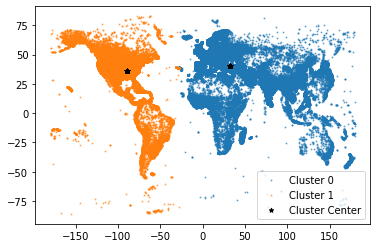

In [0]:
collected_data = df1.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])
collected_array = np.array(collected_data)
for i in range(2):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

In [0]:
predictions4_rdd = predictions4.rdd.map(lambda x: (x[0],x[1],x[4],float(centers4[x[4]][0]),float(centers4[x[4]][1])))
df2 = spark.createDataFrame(predictions4_rdd, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)
]))

import pyspark.sql.functions as F
df2 = df2.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
df2.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+------------------+------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|           eu_dist|
+-----------------+------------------+---------------+----------------+------------------+------------------+
|             36.7|         3.2166667|      48.436523|        9.999369|1416923.7066886013|183.75101049274076|
|             42.5|         1.5166667|      48.436523|        9.999369| 933439.1195545978|107.19854807519368|
|        12.516666|         -70.03333|      35.934708|      -88.915085| 3218406.521958237| 904.9252141390025|
+-----------------+------------------+---------------+----------------+------------------+------------------+
only showing top 3 rows



In [0]:
df2.rdd.cache()

MapPartitionsRDD[1866] at javaToPython at <unknown>:0

In [0]:
start_time = time.time()
df2.registerTempTable("df_latlong2")
sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from df_latlong2").show(10)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                             1431525.8149716915|                              385.8855322130194|
+-----------------------------------------------+-----------------------------------------------+

--- 8.840583801269531 seconds ---


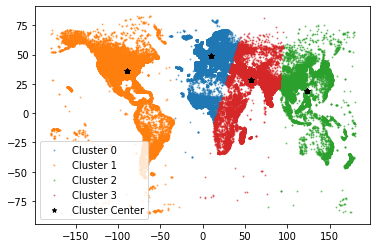

In [0]:
collected_data = df2.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])
collected_array = np.array(collected_data)
for i in range(4):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

In [0]:
predictions6_rdd = predictions6.rdd.map(lambda x: (x[0],x[1],x[4],float(centers6[x[4]][0]),float(centers6[x[4]][1])))
df3 = spark.createDataFrame(predictions6_rdd, schema=types.StructType([\
                                                        types.StructField('original_latitude', types.FloatType(),True),
                                                        types.StructField('original_longitude', types.FloatType(),True),
                                                        types.StructField('prediction', types.IntegerType(),True),
                                                        types.StructField('center_latitude', types.FloatType(),True),
                                                        types.StructField('center_longitude', types.FloatType(),True)
]))

import pyspark.sql.functions as F
df3 = df3.withColumn("a", (\
    F.pow(F.sin(F.radians(F.col("center_latitude") - F.col("original_latitude")) / 2), 2) +\
    F.cos(F.radians(F.col("original_latitude"))) * F.cos(F.radians(F.col("center_latitude"))) *\
    F.pow(F.sin(F.radians(F.col("center_longitude") - F.col("original_longitude")) / 2), 2)\
)).withColumn("gc_dist", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)\
.drop(F.col("a"))\
.withColumn("eu_dist", F.pow( (F.col('center_latitude') - F.col('original_latitude')  ),2 )+\
                    F.pow( (F.col('center_longitude') - F.col('original_longitude')  ),2 ) )

In [0]:
df3.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+------------------+------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|           eu_dist|
+-----------------+------------------+---------------+----------------+------------------+------------------+
|             36.7|         3.2166667|       48.59884|          9.7733|1426288.6588699806|184.57178927056543|
|             42.5|         1.5166667|       48.59884|          9.7733| 933432.3362596794|105.36783580617339|
|        12.516666|         -70.03333|     -18.668272|      -63.107796| 3549762.674538302|1020.4634491852521|
+-----------------+------------------+---------------+----------------+------------------+------------------+
only showing top 3 rows



In [0]:
df3.rdd.cache()

MapPartitionsRDD[1887] at javaToPython at <unknown>:0

In [0]:
df3.registerTempTable("df_latlong3")
start_time = time.time()
sqlContext.sql("select SUM(gc_dist)/COUNT(gc_dist),SUM(eu_dist)/COUNT(eu_dist) from df_latlong3").show(10)
print("--- %s seconds ---" % (time.time() - start_time))

+-----------------------------------------------+-----------------------------------------------+
|(sum(gc_dist) / CAST(count(gc_dist) AS DOUBLE))|(sum(eu_dist) / CAST(count(eu_dist) AS DOUBLE))|
+-----------------------------------------------+-----------------------------------------------+
|                             1192528.1209456117|                             264.35301051973346|
+-----------------------------------------------+-----------------------------------------------+

--- 9.28335165977478 seconds ---


In [0]:
df3.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+------------------+------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|           eu_dist|
+-----------------+------------------+---------------+----------------+------------------+------------------+
|             36.7|         3.2166667|       48.59884|          9.7733|1426288.6588699806|184.57178927056543|
|             42.5|         1.5166667|       48.59884|          9.7733| 933432.3362596794|105.36783580617339|
|        12.516666|         -70.03333|     -18.668272|      -63.107796| 3549762.674538302|1020.4634491852521|
+-----------------+------------------+---------------+----------------+------------------+------------------+
only showing top 3 rows



In [0]:
collected_data = df3.rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()

In [0]:
import numpy as np

collected_array = np.array(collected_data)
collected_array = collected_array.reshape(-1,7)

In [0]:
import pandas as pd
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','pred','center_lat','center_long','gcd','eud'])

/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


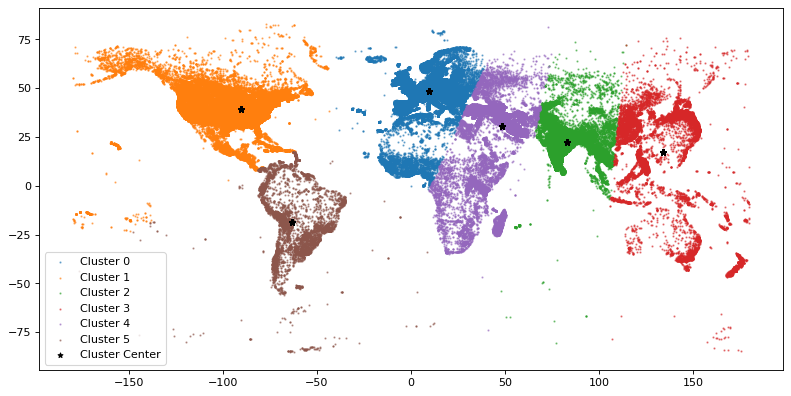

In [0]:
#colorful plot of the clusters and the cluster centers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(6):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

## We see that given the long/lat, the clusters tend to abide by our continental boundaries.

Text(0, 0.5, 'eud')

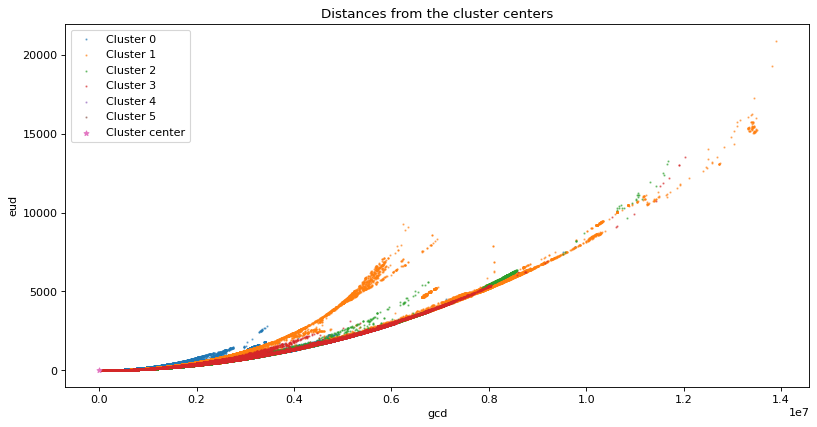

In [0]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(6):
    mask = plot_df.pred == i
    plt.scatter(plot_df.gcd[mask],plot_df.eud[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(0,0,marker="*",s=20,label="Cluster center")
plt.legend()
plt.title("Distances from the cluster centers")
plt.xlabel("gcd")
plt.ylabel("eud")

### We can see that due to the boundaries, the clusters highly represent regions we associate with continents. Furthermore, with less k-clusters, the clusters tend to be partitioned horozontally base on the latitude and longitude alone. The more clusters allowed, the more partitions along the vertical axis. This makes sense since clusters are neighborhoods of radius distance from the center, thus solely on long/lat, since distance isn't used in the input feature, the data is euclidean and easily distinguishable. At least when comparing distances, we can see that data points that higher euclidean and great circle distance are populated by many discontinuous islands and that high values in those distances represent a similar sense of being disportionately further from the center and clustered as such. The problem here is that the great circle distance and euclidean distance metrics are measured after a model is made, otherwise no center cluster locations to measure from, but what can we do with the distances? We can... built another K-Means clustering model using the already made metrics to see if anymore insight can be made.

In [0]:
df3.drop(F.col('prediction')).show(3)

+-----------------+------------------+---------------+----------------+------------------+------------------+
|original_latitude|original_longitude|center_latitude|center_longitude|           gc_dist|           eu_dist|
+-----------------+------------------+---------------+----------------+------------------+------------------+
|             36.7|         3.2166667|       48.59884|          9.7733|1426288.6588699806|184.57178927056543|
|             42.5|         1.5166667|       48.59884|          9.7733| 933432.3362596794|105.36783580617339|
|        12.516666|         -70.03333|     -18.668272|      -63.107796| 3549762.674538302|1020.4634491852521|
+-----------------+------------------+---------------+----------------+------------------+------------------+
only showing top 3 rows



In [0]:
start_time = time.time()

vecAssembler = VectorAssembler(inputCols=["eu_dist","gc_dist"], outputCol="features")
X4 = vecAssembler.transform(df3.drop(F.col('prediction')))
X4.rdd.cache()

kmeans = KMeans().setK(6).setSeed(1)
model = kmeans.fit(X4)

predictions = model.transform(X4)

predictions.rdd.cache()

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers K=6: ")
for center in centers:
    print(center)
print("--- %s seconds ---" % (time.time() - start_time))

Cluster Centers K=8: 
[  37.51888486 -121.49924973]
[  34.26623779 -117.8168311 ]
[  43.88858428 -117.47990287]
[  36.62823009 -114.6145609 ]
[  33.68736794 -111.040797  ]
[  45.36423646 -122.60772638]
[  42.67857626 -122.93767203]
[  39.19185501 -120.52861193]
--- 2.7410318851470947 seconds ---


In [0]:
predictions.take(1)

[Row(original_latitude=36.70000076293945, original_longitude=3.2166666984558105, center_latitude=48.598838806152344, center_longitude=9.773300170898438, gc_dist=1426288.6588699806, eu_dist=184.57178927056543, features=DenseVector([184.5718, 1426288.6589]), prediction=3)]

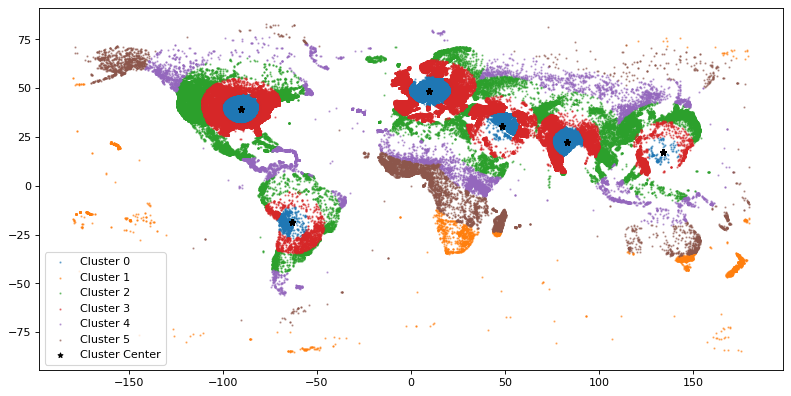

In [0]:
collected_data = predictions.drop(F.col('features')).rdd.map(lambda x: (x[0],x[1],x[2],x[3],x[4],x[5],x[6])).collect()
plot_df = pd.DataFrame(collected_array, columns=['original_lat','original_long','center_lat','center_long','gcd','eud','pred'])
collected_array = np.array(collected_data)
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(6):
    mask = plot_df.pred == i
    plt.scatter(plot_df.original_long[mask],plot_df.original_lat[mask],s=1,label="Cluster "+str(i),alpha=.5)
plt.scatter(plot_df.center_long,plot_df.center_lat,label="Cluster Center",s=20,marker="*",color='black')
plt.legend()

### Basically the clusters in this case are the radius distance from the cluster centers. We do get an understanding that the certainty of how much a point belongs to a cluster based on its distance from the center (this case, it's binned into 6 partitions.) For most clusters, clusters 0 and 1 are certain points captured within the neighborhood radius of the cluster center. This radius could be used as the converging neighborhood since in all clusters, they are the furthest cluster from any other cluster center. However, cluster 2 samples have much less of a certainty of belonging to one cluster given a fixed threshold depending on continental boundaries. The last cluster is populated by some continuous locations, but also by many discontinuous islands.

In [0]:
us_data = all_data[(all_data.Longtitude > lowest_us_long)&(all_data.Longtitude < highest_us_long)\
                  &(all_data.Latitude > lowest_us_lat)&(all_data.Latitude < highest_us_lat)]

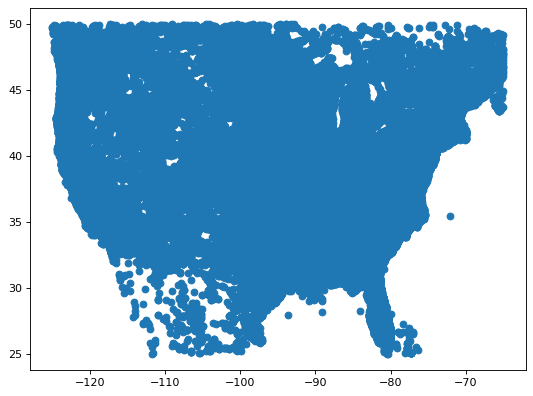

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(us_data.Longtitude,us_data.Latitude)

## Timetable contains the compiling time for:
#### K-means (5) - device location
#### K-means (2,4) - synthetic location
#### K-means (2,4,6) - DBpedia location

In [28]:
timetable

[13.699434757232666, 4.802165746688843, 44.46165060997009]